#(7) PROBLEM 3.1

In [1]:
import numpy as np

#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1=0,y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

In [2]:
import matplotlib.pyplot as plt
top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]
plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()


<Figure size 640x480 with 1 Axes>

In [3]:
# pre-processing the data for (a)
x1 = [[1] + i + [1] for i in top]
x2 = [[1] + i + [-1] for i in bottom]
data = x1 + x2
    
data = np.array(data)
np.random.shuffle(data)

In [4]:
class Perceptron(object):
    def __init__(self, data):
        self.W = np.zeros(len(data[0:3]))
        self.flag = True
        self.updates = 0;
    
    def predict(self, x):
        activation = np.sign(np.dot(self.W.T,x))
        return activation
    
    def fit(self, data):
        X = np.array(data)[:,0:3]
        d = np.array(data)[:, 3:4]
        
        while self.flag:
            self.flag = True
            for i in range(len(data)):
                y = self.predict(X[i])
                
                if y * d[i] <= 0:
                    self.W = self.W + d[i] * X[i]
                    self.updates += 1
                    self.flag = False
                    
            if self.flag:
                break
            else:
                self.flag = True

In [5]:
perceptron = Perceptron(data)
perceptron.fit(data)
print("Weight matrix =",perceptron.W)
print ("Number of updates =", perceptron.updates)

Weight matrix = [ 9.          1.21608741 43.73495172]
Number of updates = 13


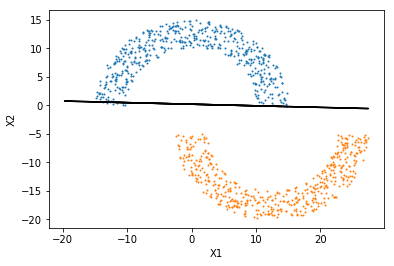

In [6]:
X = np.array(data)[:,0:3]
plt.plot(X, (perceptron.W[0]-perceptron.W[1]*X)/perceptron.W[2], color='black', linestyle='-', label='g(x)')
plt.xlabel("X1");
plt.ylabel("X2");
plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

In [7]:
class LinearRegression(object):
    def __init__(self, data):
        self.temp =0 
        
    
    def compute(self, data):
        X = np.array(data)[:,0:3]
        y = np.array(data)[:, 3:4]
        return np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)), np.transpose(X)), y)

In [8]:
linearRegression = LinearRegression(data)
Wmin = linearRegression.compute(data)
print(Wmin)

[[ 0.25357591]
 [-0.01123336]
 [ 0.07610889]]


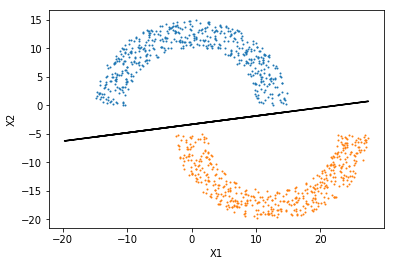

In [9]:
# X = np.array(data)[:,0:3]
Y = np.array(data)[:, 3:4]
plt.plot(X,-(Wmin[1]/Wmin[2])*X - Wmin[0]/Wmin[2] , color='black', linestyle='-', label='g(x)')
plt.xlabel("X1");
plt.ylabel("X2");
plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

# (8) problem 3.2

In [10]:
#parameters
rad = 10
thk = 5
sep = 5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1=0,y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

In [11]:
class Perceptron(object):
    def __init__(self, data):
        self.W = np.zeros(len(data[0:3]))
        self.flag = True
        self.updates = 0;
    
    def predict(self, x):
        activation = np.sign(np.dot(self.W.T,x))
        return activation
    
    def fit(self, data):
        X = np.array(data)[:,0:3]
        d = np.array(data)[:, 3:4]
        
        while self.flag:
            self.flag = True
            for i in range(len(data)):
                y = self.predict(X[i])
                
                if y * d[i] <= 0:
                    self.W = self.W + d[i] * X[i]
                    self.updates += 1
                    self.flag = False
                    
            if self.flag:
                break
            else:
                self.flag = True



In [12]:
x = 0.2
upadteArr = []
sepArr = []
while (x<5.2):
    top,bottom = generatedata(rad,thk,x,1000)
    X1 = [i[0] for i in top]
    Y1 = [i[1] for i in top]

    X2 = [i[0] for i in bottom]
    Y2 = [i[1] for i in bottom]
    
    x1 = [[1] + i + [1] for i in top]
    x2 = [[1] + i + [-1] for i in bottom]
    data = x1 + x2
    
    data = np.array(data)
    np.random.shuffle(data)
    perceptron = Perceptron(data)
    perceptron.fit(data)
    upadteArr.append(perceptron.updates)
    sepArr.append(x)
    x+=0.2

In [13]:
# Plot of sep vs number of iterations

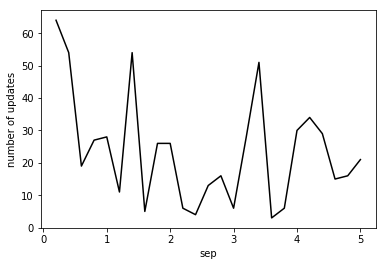

In [14]:
plt.plot(sepArr,upadteArr,  color='black', linestyle='-', label='g(x)')
plt.xlabel("sep");
plt.ylabel("number of updates");
plt.show()

# (9) problem 3.3

In [15]:
#parameters
rad = 10
thk = 5
sep = -5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1=0,y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

In [16]:
top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

x1 = [[1] + i + [1] for i in top]
x2 = [[1] + i + [-1] for i in bottom]
data = x1 + x2
    
data = np.array(data)
np.random.shuffle(data)

In [17]:
class Perceptron(object):
    def __init__(self, data):
        self.W = np.zeros(len(data[0:3]))
        self.flag = True
        self.updates = 0;
    
    def predict(self, x):
        activation = np.sign(np.dot(self.W.T,x))
        return activation
    
    def fit(self, data):
        X = np.array(data)[:,0:3]
        d = np.array(data)[:, 3:4]
        
        while self.flag:
            self.flag = True
            for i in range(len(data)):
                y = self.predict(X[i])
                
                if y * d[i] <= 0:
                    self.W = self.W + d[i] * X[i]
                    self.updates += 1
                    self.flag = False
                    
            if self.flag:
                break
            else:
                self.flag = True

In [18]:
class PerceptronWithOneUpdate(object):
    def __init__(self,data):
        self.W = np.zeros(len(data[0:3]))
    
    def predict(self, x):
        activation = np.sign(np.dot(self.W.T,x))
        return activation
    
    def fit(self, data):
        X= np.array(data)[:, 0:3]
        d = np.array(data)[:, 3:4]
        flag = True
        while flag:
            for i in range(len(data)):
                y = self.predict(X[i])
                
                if y * d[i] <= 0:
                    self.W = self.W + d[i] * X[i]
                    flag = False;
                    break;
            return self.W

In [19]:
class Pocket(object):
    def __init__(self, data):
        self.W = np.zeros(len(data[0:3]))
        self.Emin = self.computeEmin(data,self.W)
        self.EminArr = []
        self.Iterations = []
        self.Wcurr = self.W
    
    def predict(self, x, W):
        activation = np.sign(np.dot(W.T,x))
        return activation
    
    def computeEmin(self, data, W):
        count = 0
        X = np.array(data)[:, 0:3]
        d = np.array(data)[:, 3:4] 
        for i in range(len(data)):
            if d[i] != self.predict(X[i], W):
                count = count + 1
        return count/len(data)
    
    def compute(self, data):
        perceptron = PerceptronWithOneUpdate(data) 
        
        for i in range(100000):
            self.Wcurr = perceptron.fit(data)
            newEmin = self.computeEmin(data,self.Wcurr)
            
            if  newEmin < self.Emin:
                self.Emin = newEmin
                self.W = self.Wcurr
            self.EminArr.append(self.Emin)
            self.Iterations.append(i+1)



In [20]:
pocket = Pocket(data)
pocket.compute(data)
print(pocket.W);

[-38.          -2.37059944  14.78509235]


In [21]:
# Plot of E(min) vs Iterations for pocket algorithm

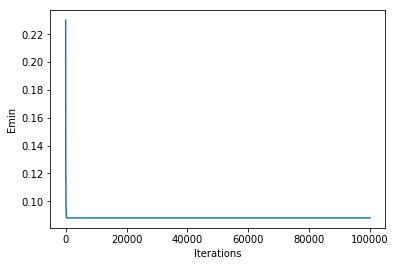

In [22]:
plt.plot(pocket.Iterations,pocket.EminArr, label='g(x)')
plt.xlabel("Iterations");
plt.ylabel("Emin");
plt.show()

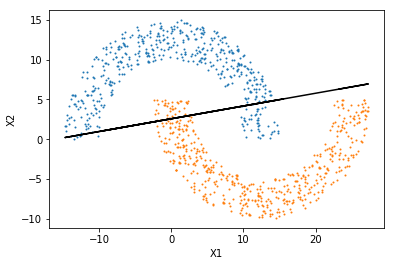

In [23]:
import matplotlib.pyplot as plt
X = np.array(data)[:,0:3]
plt.plot(X,-(pocket.W[1]/pocket.W[2])*X - pocket.W[0]/pocket.W[2] , color='black', linestyle='-', label='g(x)')
plt.xlabel("X1");
plt.ylabel("X2");
plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()



In [24]:
class LinearRegression(object):
    def __init__(self, data):
        self.Wmin = []
        
    def compute(self, data):
        X = np.array(data)[:,0:3]
        y = np.array(data)[:, 3:4]
        self.Wmin = np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(X),X)), np.transpose(X)), y)

In [25]:
linearRegression = LinearRegression(data)
linearRegression.compute(data)

In [26]:
#plot for linear regression

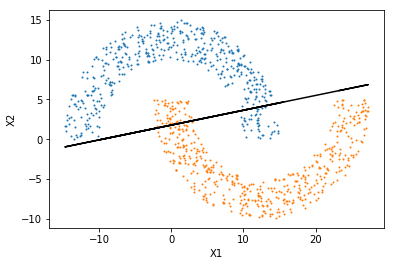

In [27]:
X = np.array(data)[:,0:3]
Y = np.array(data)[:, 3:4]
plt.plot(X,-(linearRegression.Wmin[1]/linearRegression.Wmin[2])*X - linearRegression.Wmin[0]/linearRegression.Wmin[2] , color='black', linestyle='-', label='g(x)')
plt.xlabel("X1");
plt.ylabel("X2");
plt.scatter(X1,Y1,s = 1)
plt.scatter(X2,Y2,s = 1)
plt.show()

### Linear regression takes less time than pocket algorithm;However pocket algorithm performs better than Linear algorithm

In [28]:
#parameters
rad = 10
thk = 5
sep = -5

#n data points,(x1,y1) are the coordinates of the top semi-circle
def generatedata(rad,thk,sep,n,x1=0,y1=0):
    # center of the top semi-circle
    X1 = x1
    Y1 = y1

    # center of the bottom semi-circle
    X2 = X1 + rad + thk / 2
    Y2 = Y1 - sep
    
    # data points in the top semi-circle
    top = []
    # data points in the bottom semi-circle
    bottom = []
    
    # parameters
    r1 = rad + thk
    r2 = rad
    
    cnt = 1
    while(cnt <= n):
        #uniformed generated points
        x = np.random.uniform(-r1,r1)
        y = np.random.uniform(-r1,r1)
        
        d = x**2 + y**2
        if(d >= r2**2 and d <= r1**2):
            if (y > 0):
                top.append([X1 + x,Y1 + y])
                cnt += 1
            else:
                bottom.append([X2 + x,Y2 + y])
                cnt += 1
        else:
            continue

    return top,bottom

In [29]:
top,bottom = generatedata(rad,thk,sep,1000)

X1 = [i[0] for i in top]
Y1 = [i[1] for i in top]

X2 = [i[0] for i in bottom]
Y2 = [i[1] for i in bottom]

x1 = [[1] + i + [1] for i in top]
x2 = [[1] + i + [-1] for i in bottom]
data = x1 + x2
    
data = np.array(data)
np.random.shuffle(data)



In [30]:
class PerceptronWithOneUpdate(object):
    def __init__(self, Z):
        self.W = np.zeros(len(Z[0:10]))
    
    def predict(self, x):
        activation = np.sign(np.dot(self.W.T,x))
        return activation
    
    def fit(self, data, Z):
        d = np.array(data)[:, 3:4]
        flag = True
        while flag:
            for i in range(len(data)):
                y = self.predict(Z[i])
                
                if y * d[i] <= 0:
                    self.W = self.W + d[i] * Z[i]
                    flag = False;
                    break;
            return self.W

In [31]:
class Pocket(object):
    def __init__(self, data, Z):
        self.W = np.zeros(len(Z[0:10]))
        self.Emin = self.computeEmin(data, Z,self.W)
        self.EminArr = []
        self.Iterations = []
        self.Wcurr = self.W
    
    def predict(self, x, W):
        activation = np.sign(np.dot(W.T,x))
        return activation
    
    def computeEmin(self, data,Z, W):
        count = 0
        d = np.array(data)[:, 3:4]
        for i in range(len(data)):
            if d[i] != self.predict(Z[i], W):
                count = count + 1
        return count/len(data)
    
    def compute(self, data, Z):
        perceptron = PerceptronWithOneUpdate(Z) 
        
        for i in range(100000):
            self.Wcurr = perceptron.fit(data, Z)
            newEmin = self.computeEmin(data,Z,self.Wcurr)
            
            if  newEmin < self.Emin:
                self.Emin = newEmin
                self.W = self.Wcurr
            self.EminArr.append(self.Emin)
            self.Iterations.append(i+1)

In [32]:
class LinearRegression(object):
        
    
    def compute(self, data, Z):
        y = np.array(data)[:, 3:4]
        return np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(Z),Z)), np.transpose(Z)), y)

In [33]:
from sklearn.preprocessing import PolynomialFeatures
degree = 3
Xn = np.array(data)[:,1:3]
poly = PolynomialFeatures(degree)
Z= poly.fit_transform(Xn)

In [34]:
linearRegression = LinearRegression()
Wmin = linearRegression.compute(data, Z)
print(Wmin)

[[-8.22417325e-01]
 [ 1.53304628e-02]
 [ 1.35991024e-01]
 [ 8.39261160e-03]
 [ 1.24727503e-02]
 [ 1.45173710e-02]
 [-3.76185783e-04]
 [-5.77193936e-04]
 [-1.04486570e-03]
 [-1.09440326e-03]]


In [35]:
pocket = Pocket(data, Z)
pocket.compute(data, Z)
print(pocket.W);

[ -81490.          -85675.38819806   -2509.62163422   90932.01558903
   82022.08664275 -182429.1146915    -6041.79976116    9328.11209143
  -30714.14022289   31496.2710635 ]


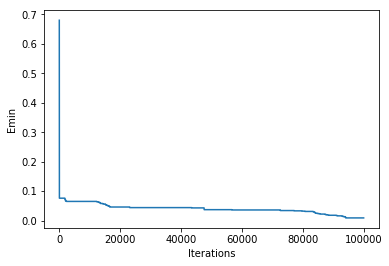

In [36]:
plt.plot(pocket.Iterations,pocket.EminArr, label='g(x)')
plt.xlabel("Iterations");
plt.ylabel("Emin");
plt.show()

##linear regression contour plot

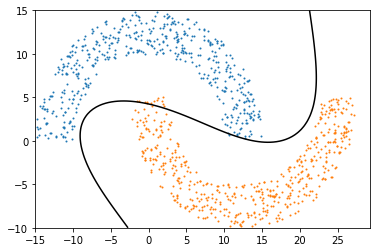

In [37]:
#w3_linear=linear_regression(data,order=3) w3_linear = [val for sublist in w3_linear for val in sublist] 
#print(w3_linear); print('3rd Order Linear Regression Ein : ',error(w3_linear,3)) 
w=Wmin
xlist = np.linspace(-15.0, 25.0,100) 
ylist = np.linspace(-10.0, 15.0,100)  
X,Y = np.meshgrid(xlist, ylist) 
F = w[0]+w[1]*X+w[2]*Y+w[3]*X*X+w[4]*X*Y+w[5]*Y*Y+w[6]*X*X*X+w[7]*X*X*Y+w[8]*X*Y*Y+w[9]*Y*3 
plt.contour(X, Y, F, [0], colors = 'k', linestyles = 'solid') 
plt.scatter(X1,Y1,s = 1) 
plt.scatter(X2,Y2,s=1)
plt.show()



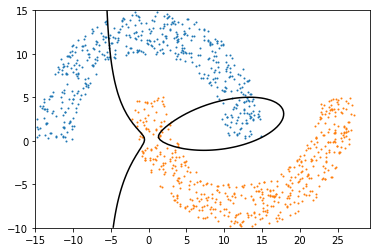

In [38]:
w = pocket.W
xlist = np.linspace(-15.0, 25.0,100) 
ylist = np.linspace(-10.0, 15.0,100)  
X,Y = np.meshgrid(xlist, ylist) 
F = w[0]+w[1]*X+w[2]*Y+w[3]*X*X+w[4]*X*Y+w[5]*Y*Y+w[6]*X*X*X+w[7]*X*X*Y+w[8]*X*Y*Y+w[9]*Y*3 
plt.contour(X, Y, F, [0], colors = 'k', linestyles = 'solid') 
plt.scatter(X1,Y1,s = 1) 
plt.scatter(X2,Y2,s=1)
plt.show()

### Linear algorithm performs faster than pocket algorithm;Performance of linear algorithm is better than pocket in Z dimensional space